In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
news_data=pd.read_csv('newsdata.csv')

In [3]:
news_data.head()

,Unnamed: 0,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
0,0,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,2007-01-01 04:29:32+00:00,e58c6279551b85cf,China's Daqing pumps 43.41 mln tonnes of oil i...,3,1,RTRS,"{'ENR', 'ASIA', 'CN', 'NGS', 'EMRG', 'RTRS', '...",...,0,0,0,0,0,0,0,3,6,7
1,1,2007-01-01 07:03:35+00:00,2007-01-01 07:03:34+00:00,2007-01-01 07:03:34+00:00,5a31c4327427f63f,"FEATURE-In kidnapping, finesse works best",3,1,RTRS,"{'FEA', 'CA', 'LATAM', 'MX', 'INS', 'ASIA', 'I...",...,1,1,1,1,1,1,1,3,3,3
2,2,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,2007-01-01 11:29:56+00:00,1cefd27a40fabdfe,PRESS DIGEST - Wall Street Journal - Jan 1,3,1,RTRS,"{'RET', 'ENR', 'ID', 'BG', 'US', 'PRESS', 'IQ'...",...,0,0,0,0,0,0,0,5,11,17
3,3,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...",...,0,0,0,0,0,0,0,5,13,15
4,4,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,2007-01-01 12:08:37+00:00,23768af19dc69992,PRESS DIGEST - New York Times - Jan 1,3,1,RTRS,"{'FUND', 'FIN', 'CA', 'SFWR', 'INS', 'PUB', 'B...",...,0,0,0,0,0,0,0,0,0,0


In [4]:
news_data=news_data.iloc[:,1:]

In [9]:
news_data.shape

(9328750, 35)

In [5]:
news_data.isnull().sum()

time                          0
sourceTimestamp               0
firstCreated                  0
sourceId                      0
headline                  73960
urgency                       0
takeSequence                  0
provider                      0
subjects                      0
audiences                     0
bodySize                      0
companyCount                  0
headlineTag             6341993
marketCommentary              0
sentenceCount                 0
wordCount                     0
assetCodes                    0
assetName                     0
firstMentionSentence          0
relevance                     0
sentimentClass                0
sentimentNegative             0
sentimentNeutral              0
sentimentPositive             0
sentimentWordCount            0
noveltyCount12H               0
noveltyCount24H               0
noveltyCount3D                0
noveltyCount5D                0
noveltyCount7D                0
volumeCounts12H               0
volumeCo

In [6]:
news_data.nunique()

time                    5245343
sourceTimestamp         5228340
firstCreated            3441535
sourceId                6340206
headline                5532378
urgency                       3
takeSequence                 97
provider                     30
subjects                1733963
audiences                 88488
bodySize                  61200
companyCount                 43
headlineTag                 162
marketCommentary              2
sentenceCount               669
wordCount                 10365
assetCodes                10691
assetName                  8902
firstMentionSentence        516
relevance                 28412
sentimentClass                3
sentimentNegative       1321080
sentimentNeutral         582507
sentimentPositive       1025372
sentimentWordCount         6493
noveltyCount12H             501
noveltyCount24H             501
noveltyCount3D              501
noveltyCount5D              501
noveltyCount7D              501
volumeCounts12H            2565
volumeCo

In [7]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328750 entries, 0 to 9328749
Data columns (total 35 columns):
time                    object
sourceTimestamp         object
firstCreated            object
sourceId                object
headline                object
urgency                 int64
takeSequence            int64
provider                object
subjects                object
audiences               object
bodySize                int64
companyCount            int64
headlineTag             object
marketCommentary        bool
sentenceCount           int64
wordCount               int64
assetCodes              object
assetName               object
firstMentionSentence    int64
relevance               float64
sentimentClass          int64
sentimentNegative       float64
sentimentNeutral        float64
sentimentPositive       float64
sentimentWordCount      int64
noveltyCount12H         int64
noveltyCount24H         int64
noveltyCount3D          int64
noveltyCount5D          int64

### Let's change the datatype of variables to make them more functionable and reduce the memory usage.

In [11]:
for columnname in news_data.columns:
    if news_data[columnname].dtype=='float64':
        news_data[columnname]=news_data[columnname].astype('float32')
    elif news_data[columnname].dtype=='int64':
        news_data[columnname]=news_data[columnname].astype('int32')
news_data['urgency']=news_data['urgency'].astype('int8')
news_data['provider']=news_data['provider'].astype('category')
news_data['subjects']=news_data['subjects'].astype('category')
news_data['audiences']=news_data['audiences'].astype('category')


In [12]:
news_data['time'] =  pd.to_datetime(news_data['time'], format='%Y-%m-%d %H:%M:%S+00:00')
news_data['sourceTimestamp'] =  pd.to_datetime(news_data['sourceTimestamp'], format='%Y-%m-%d %H:%M:%S+00:00')
news_data['firstCreated'] =  pd.to_datetime(news_data['firstCreated'], format='%Y-%m-%d %H:%M:%S+00:00')

In [13]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328750 entries, 0 to 9328749
Data columns (total 35 columns):
time                    datetime64[ns]
sourceTimestamp         datetime64[ns]
firstCreated            datetime64[ns]
sourceId                object
headline                object
urgency                 int8
takeSequence            int32
provider                category
subjects                category
audiences               category
bodySize                int32
companyCount            int32
headlineTag             object
marketCommentary        bool
sentenceCount           int32
wordCount               int32
assetCodes              object
assetName               object
firstMentionSentence    int32
relevance               float32
sentimentClass          int32
sentimentNegative       float32
sentimentNeutral        float32
sentimentPositive       float32
sentimentWordCount      int32
noveltyCount12H         int32
noveltyCount24H         int32
noveltyCount3D          int32


In [14]:
news_data=news_data[news_data.time>datetime.date(2009, 1, 1)]

C:\Users\chinn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.


In [43]:
100-news_data.shape[0]*100/9328750

16.306514806378132

In [15]:
news_data.head(2)

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,...,noveltyCount12H,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D
1521194,2009-01-01 00:25:02,2009-01-01 00:25:01,2009-01-01 00:25:01,6bf957cb4d7b0ce1,"Churchill Downs Incorporated, KHBPA, KTA Reach...",3,1,BSW,"{'ENTS', 'EQUE', 'CYCS', 'NEWR', 'LEI', 'RELX'...","{'BSW', 'CNR'}",...,0,0,0,0,0,0,0,0,0,0
1521195,2009-01-01 00:25:03,2009-01-01 00:25:01,2009-01-01 00:25:01,aceb69df2660a6f5,Corgi International Limited Announces Financia...,3,1,BSW,"{'CYCP', 'RET', 'CYCS', 'ASIA', 'HK', 'NEWR', ...","{'BSW', 'CNR', 'CNRA'}",...,0,0,0,0,0,0,0,0,0,0


In [12]:
news_data['urgency'].value_counts()

3    6162567
1    3166158
2         25
Name: urgency, dtype: int64

In [13]:
news_data.headline[news_data['urgency']==1].head(1).values

array(["INDIA'S HERO HONDA <HROH.BO> DEC VEHICLE SALES 252,462  UNITS VS 245,104 YEAR AGO "],
      dtype=object)

In [14]:
news_data.headline[news_data['urgency']==2].head(1).values

array(['BRIEF-Terrapin 3 Acquisition Corporation to buy Yatra Online, Inc.<TRTL.O>'],
      dtype=object)

In [15]:
news_data.headline[news_data['urgency']==3].head(1).values

array(["China's Daqing pumps 43.41 mln tonnes of oil in 06"], dtype=object)

In [16]:
news_data.assetCodes[news_data['urgency']==3].head(1).values

array(["{'0857.HK', '0857.F', '0857.DE', 'PTR.N'}"], dtype=object)

In [17]:
news_data.takeSequence.value_counts()[:10]

1     6747890
2      831166
3      465806
4      310821
5      222402
6      163805
7      124725
8       96287
9       74009
10      56180
Name: takeSequence, dtype: int64

In [18]:
news_data[['sentimentClass','sentimentNegative', 'sentimentNeutral','sentimentPositive']].head()

,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive
0,-1,0.500739,0.419327,0.079934
1,-1,0.600082,0.345853,0.054064
2,-1,0.450049,0.295671,0.254280
3,-1,0.752917,0.162715,0.084368
4,-1,0.699274,0.209360,0.091366


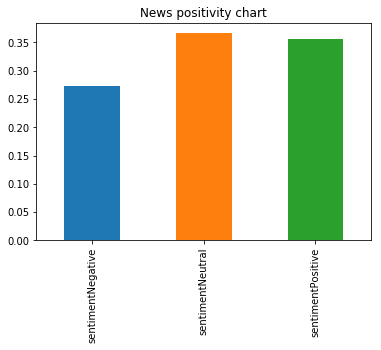

In [19]:
    # Barplot on negative, neutral and positive columns.
news_data[['sentimentNegative', 'sentimentNeutral','sentimentPositive']].mean().plot(kind='bar')
plt.title("News positivity chart")
plt.show()

In [17]:
news_data['delay_time']=news_data['time']-news_data['firstCreated']

In [22]:
news_data['time']=news_data['time'].dt.date

In [21]:
def plot_vs_time(data_frame, column, calculation='mean', span=10):
    if calculation == 'mean':
        group_temp = data_frame.groupby('time')[column].mean().reset_index()
    if calculation == 'count':
        group_temp = data_frame.groupby('time')[column].count().reset_index()
    if calculation == 'nunique':
        group_temp = data_frame.groupby('time')[column].nunique().reset_index()
    fig = plt.figure(figsize=(10,3))
    plt.plot(group_temp['time'], group_temp[column])
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.title('%s versus time' %column)

Text(0, 0.5, 'Count')

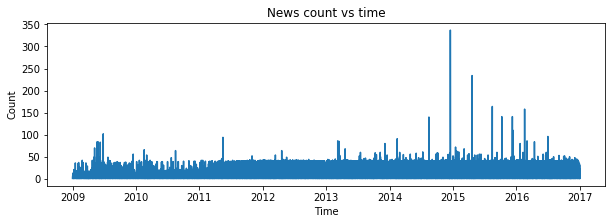

In [22]:
plot_vs_time(news_data, 'sourceId', calculation='count', span=10)
plt.title('News count vs time')
plt.ylabel('Count')

In [25]:
provider_count = news_data.groupby('provider')['sourceId'].count()

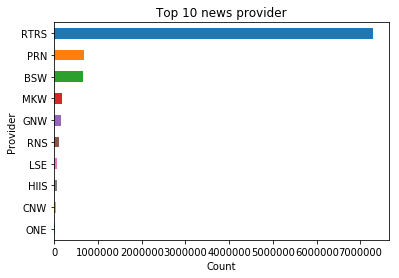

In [26]:
provider_sort = provider_count.sort_values(ascending= False)
provider_sort[:10].plot.barh()
plt.xlabel('Count')
plt.ylabel('Provider')
plt.title('Top 10 news provider')
plt.gca().invert_yaxis()
del provider_count

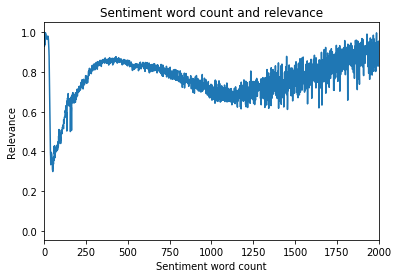

In [27]:
sentimentWordRatio = news_data.groupby('sentimentWordCount')['relevance'].mean()
plt.plot(sentimentWordRatio)
plt.xlim(0,2000)
plt.ylabel('Relevance')
plt.xlabel('Sentiment word count')
plt.title('Sentiment word count and relevance')
del sentimentWordRatio

In [23]:
for i, j in zip([-1, 0, 1], ['negative', 'neutral', 'positive']):
    df_sentiment = news_data.loc[news_data['sentimentClass'] == i, 'assetName']
    print(f'Top mentioned companies for {j} sentiment are:')
    print(df_sentiment.value_counts().head(5))
    print('')

Top mentioned companies for negative sentiment are:
JPMorgan Chase & Co        24262
Apple Inc                  24148
Bank of America Corp       23007
Citigroup Inc              22421
Goldman Sachs Group Inc    20570
Name: assetName, dtype: int64

Top mentioned companies for neutral sentiment are:
HSBC Holdings PLC    20799
Barclays PLC         15133
Deutsche Bank AG     14840
Credit Suisse AG     14632
Apple Inc            11921
Name: assetName, dtype: int64

Top mentioned companies for positive sentiment are:
Apple Inc                20533
Barclays PLC             19561
General Electric Co      16555
Royal Dutch Shell PLC    16369
Boeing Co                15289
Name: assetName, dtype: int64



In [25]:
news_data['headline']=news_data['headline'].fillna('')

In [26]:
news_data['headline'].map(len).mean()

77.71627344075407

In [27]:
news_data['headline'].map(len).max()

272

In [28]:
news_data['headline'].map(len).min()

0

In [29]:
news_data[news_data.headline.map(len)==0]

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,...,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D,delay_time
1521402,2009-01-02 11:11:26,2009-01-02 11:11:26,2009-01-02 11:10:18,f704b7195d2630f4,,3,1,RTRS,"{'FINS', 'US', 'BNK', 'RTRS', 'BSVC', 'RCH', '...","{'E', 'PSC', 'NAW', 'U'}",...,0,0,0,0,1,1,1,1,1,00:01:08
1521447,2009-01-02 12:29:28,2009-01-02 12:29:28,2009-01-02 12:29:11,a2b08707144a2e70,,3,1,RTRS,"{'CHEM', 'BMAT', 'US', 'COMC', 'CHE', 'RCH', '...","{'E', 'PSC', 'NAW', 'U'}",...,0,0,0,0,1,1,56,176,176,00:00:17
1521462,2009-01-02 12:53:00,2009-01-02 12:53:00,2009-01-02 12:50:38,905209eb39d3b19c,,3,1,RTRS,"{'EUROPE', 'ELC', 'WEU', 'TECH', 'US', 'SEMI',...","{'UKI', 'PSC', 'U', 'NAW', 'E'}",...,0,0,0,0,2,2,2,2,2,00:02:22
1521463,2009-01-02 12:53:00,2009-01-02 12:53:00,2009-01-02 12:50:38,905209eb39d3b19c,,3,1,RTRS,"{'EUROPE', 'ELC', 'WEU', 'TECH', 'US', 'SEMI',...","{'UKI', 'PSC', 'U', 'NAW', 'E'}",...,0,0,0,0,1,1,1,1,1,00:02:22
1521601,2009-01-02 14:36:07,2009-01-02 14:36:07,2009-01-02 14:35:38,a5db1545921197df,,3,1,RTRS,"{'SWIT', 'US', 'TECH', 'SOFW', 'RTRS', 'RCH', ...","{'E', 'PSC', 'NAW', 'U'}",...,0,0,0,0,1,1,1,1,1,00:00:29
1521602,2009-01-02 14:38:22,2009-01-02 14:38:22,2009-01-02 14:37:48,7ca50e16d4a0ca9a,,3,1,RTRS,"{'CMSS', 'MAC', 'INDS', 'US', 'ENVS', 'ISER', ...","{'E', 'PSC', 'NAW', 'U'}",...,0,0,0,0,1,1,5,5,5,00:00:34
1522405,2009-01-05 06:17:11,2009-01-05 06:17:11,2009-01-05 06:16:54,c0ae3e6cd77ab29e,,3,1,RTRS,"{'EUROPE', 'WEU', 'CH', 'FINS', 'INVS', 'BNK',...","{'E', 'PSC'}",...,0,0,0,0,3,3,3,20,36,00:00:17
1522480,2009-01-05 08:33:19,2009-01-05 08:33:19,2009-01-05 08:09:04,15202c85fcd07c00,,3,1,RTRS,"{'EUROPE', 'GB', 'MEMI', 'WEU', 'BMAT', 'MINE'...","{'UKI', 'E', 'PSC'}",...,0,0,0,0,2,2,2,6,22,00:24:15
1522491,2009-01-05 09:08:24,2009-01-05 09:08:24,2009-01-05 09:07:58,2e2ec98f85fe15e2,,3,1,RTRS,"{'EUROPE', 'WEU', 'FINS', 'BNK', 'RTRS', 'BSVC...","{'UKI', 'E', 'PSC', 'U'}",...,0,0,0,0,7,8,14,28,39,00:00:26
1522619,2009-01-05 11:28:38,2009-01-05 11:28:38,2009-01-05 11:28:08,47506cf9f09aebd4,,3,1,RTRS,"{'FINS', 'US', 'BNK', 'RTRS', 'BSVC', 'RCH', '...","{'E', 'PSC', 'NAW', 'U'}",...,0,0,0,0,1,1,8,8,10,00:00:30


In [30]:
news_data[news_data.headline.map(len)==272]

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,...,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D,delay_time
3086030,2010-10-27 15:48:01,2010-10-27 15:48:01,2010-10-27 15:48:01,3511350c6faaed0a,"PRESS RELEASE - CHICAGO-BASED \\""JAM THEATRICA...",1,1,RTRS,"{'RORA', 'TRAN', 'RRLF', 'INDS', 'US', 'RTRS',...","{'E', 'U'}",...,0,0,0,0,7,7,7,7,7,0 days
3086404,2010-10-27 17:59:00,2010-10-27 17:59:00,2010-10-27 17:59:00,d19099a829f8c69d,"PRESS RELEASE - CHICAGO-BASED \\""JAM THEATRICA...",1,1,RTRS,"{'RORA', 'TRAN', 'RRLF', 'INDS', 'US', 'RTRS',...","{'E', 'U'}",...,0,0,0,0,8,8,8,8,8,0 days


C:\Users\chinn\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


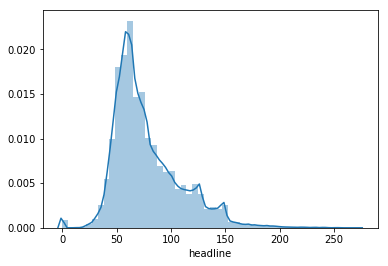

In [31]:
sns.distplot(news_data.headline.map(len))

In [32]:
news_data.bodySize.min()

0

In [33]:
news_data.bodySize.max()

122770


KeyboardInterrupt



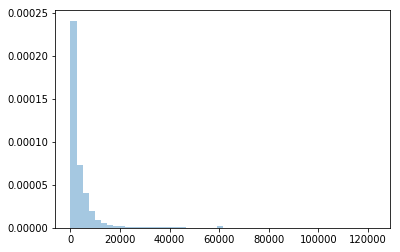

In [34]:
sns.distplot(news_data.bodySize)

In [40]:
news_data[news_data.companyCount==news_data.companyCount.max()].head()

,time,sourceTimestamp,firstCreated,sourceId,headline,urgency,takeSequence,provider,subjects,audiences,...,noveltyCount24H,noveltyCount3D,noveltyCount5D,noveltyCount7D,volumeCounts12H,volumeCounts24H,volumeCounts3D,volumeCounts5D,volumeCounts7D,delay_time
5951141,2013-09-12,2013-09-12 10:13:18,2013-09-12 10:13:18,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",...,0,0,0,0,4,4,4,4,4,00:00:01
5951142,2013-09-12,2013-09-12 10:13:18,2013-09-12 10:13:18,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",...,0,0,0,0,19,19,26,26,26,00:00:01
5951143,2013-09-12,2013-09-12 10:13:18,2013-09-12 10:13:18,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",...,0,0,0,0,3,3,10,10,10,00:00:01
5951144,2013-09-12,2013-09-12 10:13:18,2013-09-12 10:13:18,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",...,1,1,1,1,3,6,6,6,6,00:00:01
5951145,2013-09-12,2013-09-12 10:13:18,2013-09-12 10:13:18,d6de134f025a1ace,"U.S. RESEARCH ROUNDUP: MasterCard, Morgan Stan...",3,1,RTRS,"{'BLR', 'PPRO', 'INVB', 'FOBE', 'RUBB', 'HECA'...","{'E', 'PSC', 'NAW', 'U'}",...,3,3,3,3,3,7,23,23,24,00:00:01


In [35]:
news_data['subjects'].head()

1521194    {'ENTS', 'EQUE', 'CYCS', 'NEWR', 'LEI', 'RELX'...
1521195    {'CYCP', 'RET', 'CYCS', 'ASIA', 'HK', 'NEWR', ...
1521196    {'COEN', 'INDS', 'SG', 'RTRS', 'EMRG', 'AUTO',...
1521197    {'COEN', 'INDS', 'SG', 'RTRS', 'EMRG', 'AUTO',...
1521198    {'FUND', 'AUTO', 'CYCS', 'DBT', 'NEWS', 'WASH'...
Name: subjects, dtype: category
Categories (1733963, object): [{'AAA', 'ABS', 'BANK', 'DBT', 'CEEU', 'WEU', '..., {'AAA', 'ABS', 'DBT', 'CEEU', 'WEU', 'CH', 'LE..., {'AAA', 'ABS', 'DBT', 'DE', 'CEEU', 'WEU', 'CD..., {'AAA', 'AFR', 'DBT', 'WEU', 'ZA', 'IGD', 'LEN..., ..., {'ZNC', 'MEMI', 'ASIA', 'BASMTL', 'MIN', 'COM'..., {'ZNC', 'MEMI', 'AU', 'ASIA', 'COM', 'BASMTL',..., {'ZNC', 'MEMI', 'AU', 'ASIA', 'COM', 'BASMTL',..., {'ZNC', 'RTRS', 'MCE', 'ASIA', 'COM', 'BASMTL'...]

In [41]:
news_data['subjects'] = news_data['subjects'].apply(lambda x: x[1:-1].replace("'", ""))

In [42]:
news_data['subjects']=news_data['subjects'].str.split(",")

Text(0.5, 1.0, 'Pair-wise correlation')

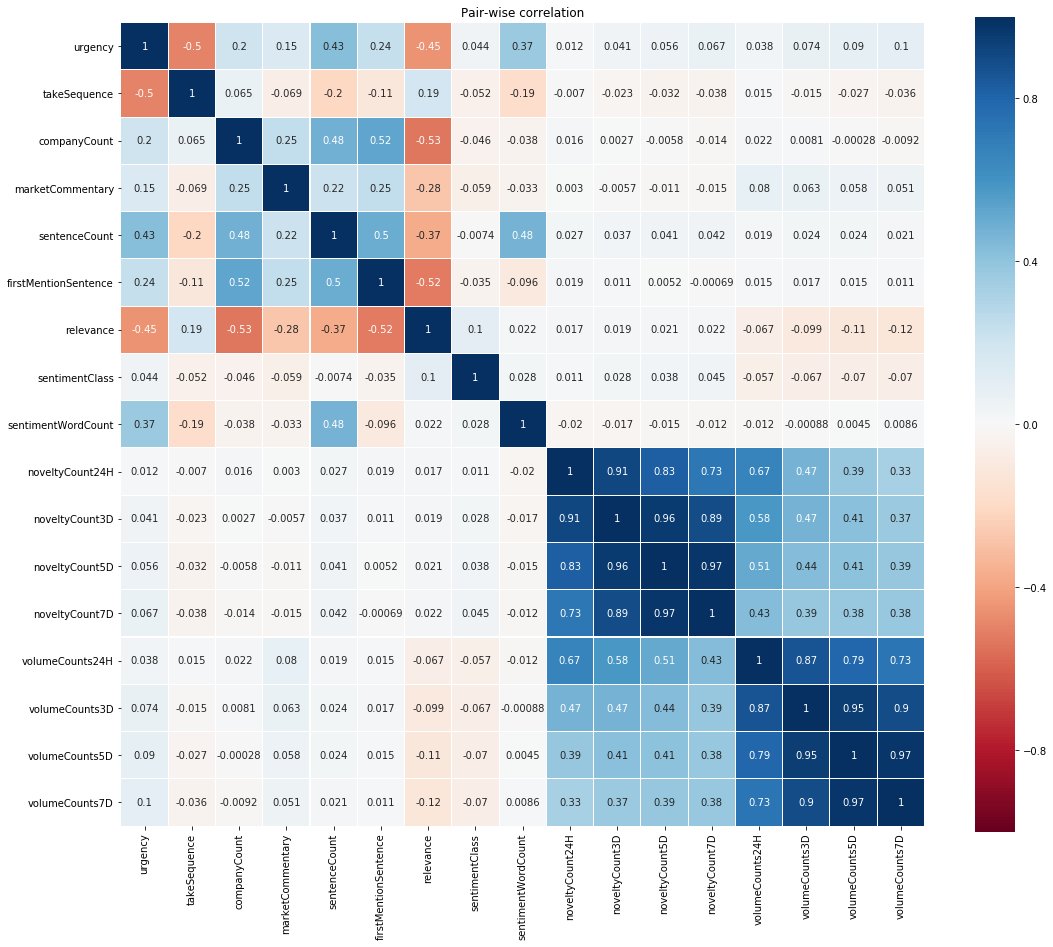

In [43]:
columns_corr = ['urgency', 'takeSequence', 'companyCount','marketCommentary','sentenceCount',\
           'firstMentionSentence','relevance','sentimentClass','sentimentWordCount','noveltyCount24H',\
           'noveltyCount3D', 'noveltyCount5D', 'noveltyCount7D','volumeCounts24H','volumeCounts3D','volumeCounts5D','volumeCounts7D']
colormap = plt.cm.RdBu
plt.figure(figsize=(18,15))
sns.heatmap(news_data[columns_corr].astype(float).corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=colormap, linecolor='white', annot=True)
plt.title('Pair-wise correlation')

In [36]:
news_data['headlinelength']=news_data['headline'].map(len)

In [37]:
dropfeatures=['sourceTimestamp','firstCreated','sourceId','headline','takeSequence','provider','subjects','audiences','headlineTag','volumeCounts7D','volumeCounts5D','volumeCounts24H','noveltyCount7D','noveltyCount5D','noveltyCount24H']

In [38]:
news_data.drop(dropfeatures, axis=1, inplace=True)

In [39]:
news_data.to_csv('newsdatapreprocessed.csv')